<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF61_70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_61_70/imori.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_61_70/gazo.png
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_61_70/renketsu.png
  
from google.colab.patches import cv2_imshow

--2019-05-04 08:59:45--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_61_70/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-05-04 08:59:45 (103 MB/s) - ‘imori.jpg’ saved [12638/12638]

--2019-05-04 08:59:46--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_61_70/gazo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 877 [image/png]
Savin

#61 4-連結数

In [0]:
import cv2
import numpy as np

img = cv2.imread("renketsu.png").astype(np.float32)
H, W, C = img.shape

tmp = np.zeros((H, W), dtype=np.int)
tmp[img[..., 0]>0] = 1

out = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        if tmp[y, x] < 1:
            continue
 #分類がCの値（0~4）でできる           
        c = 0
        c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
        c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
        c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
        c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
#色付
        if c == 0:
            out[y,x] = [0, 0, 255]
        elif c == 1:
            out[y,x] = [0, 255, 0]
        elif c == 2:
            out[y,x] = [255, 0, 0]
        elif c == 3:
            out[y,x] = [255, 255, 0]
        elif c == 4:
            out[y,x] = [255, 0, 255]
                
out = out.astype(np.uint8)
cv2_imshow(out)

#62 8-連結数

In [0]:
import cv2
import numpy as np

img = cv2.imread("renketsu.png").astype(np.float32)
H, W, C = img.shape

_tmp = np.zeros((H, W), dtype=np.int)
_tmp[img[..., 0]>0] = 1
#01を反転させて処理するために初めから反転させておく
tmp = 1 - _tmp

out = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        if _tmp[y, x] < 1:
            continue
 #分類がCの値（0~4）でできる           
        c = 0
        c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
        c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
        c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
        c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
#色付
        if c == 0:
            out[y,x] = [0, 0, 255]
        elif c == 1:
            out[y,x] = [0, 255, 0]
        elif c == 2:
            out[y,x] = [255, 0, 0]
        elif c == 3:
            out[y,x] = [255, 255, 0]
        elif c == 4:
            out[y,x] = [255, 0, 255]
                
out = out.astype(np.uint8)
cv2_imshow(out)

#63 細線化処理

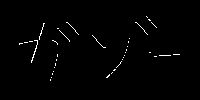

In [0]:
import cv2
import numpy as np

img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=np.int)
out[img[..., 0] > 0] = 1

count = 1
while count > 0:
    count = 0
    tmp = out.copy()
    
    for y in range(H):
        for x in range(W):
            if out[y, x] < 1:
                continue
            judge = 0
            
            ## condition 1
            if (tmp[y,min(x+1,W-1)] + tmp[max(y-1,0), x] + tmp[y,max(x-1,0)] + tmp[min(y+1,H-1),x]) < 4:
                judge += 1
            
            ## condition 2
            c = 0
            c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)]*tmp[max(y-1,0),min(x+1,W-1)]*tmp[max(y-1,0),x])
            c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x]*tmp[max(y-1,0),max(x-1,0)]*tmp[y,max(x-1,0)])
            c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)]*tmp[min(y+1,H-1),max(x-1,0)]*tmp[min(y+1,H-1),x])
            c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x]*tmp[min(y+1,H-1),min(x+1,W-1)]*tmp[y,min(x+1,W-1)])
            if c == 1:
                judge += 1
            
            ## condition 3
            if np.sum(tmp[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 4:
                judge += 1
            
            if judge == 3:
                out[y,x] = 0
                count += 1
                
out = out.astype(np.uint8) * 255
cv2_imshow(out)

#64 ヒルディッチの細線化

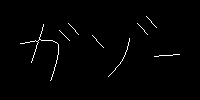

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=np.int)
out[img[..., 0]>0] = 1

tmp = out.copy()
_tmp = 1 - tmp


count = 1
while count > 0:
    count = 0
    tmp = out.copy()
    _tmp = 1 - tmp
    tmp2 = out.copy()
    _tmp2 = 1 - tmp2

    for y in range(H):
        for x in range(W):
            if out[y, x] < 1:
                continue
            judge = 0
            ## condition 1   注目画素の4近傍に0が一つ以上存在する
            if (tmp[y, min(x+1, W-1)] * tmp[max(y-1, 0), x] * tmp[y, max(x-1, 0)] * tmp[min(y+1, H-1), x]) == 0:
                judge += 1
            
            ## condition 2   x0の8-連結数が1である
            c = 0
            c += (_tmp[y, min(x+1, W-1)] - _tmp[y, min(x+1, W-1)] * _tmp[max(y-1, 0), min(x+1, W-1)] * _tmp[max(y-1, 0), x])
            c += (_tmp[max(y-1,0),x] - _tmp[max(y-1,0),x] * _tmp[max(y-1,0),max(x-1,0)] * _tmp[y,max(x-1,0)])
            c += (_tmp[y,max(x-1,0)] - _tmp[y,max(x-1,0)] * _tmp[min(y+1,H-1),max(x-1,0)] * _tmp[min(y+1,H-1),x])
            c += (_tmp[min(y+1,H-1),x] - _tmp[min(y+1,H-1),x] * _tmp[min(y+1,H-1),min(x+1,W-1)] * _tmp[y,min(x+1,W-1)])
            if c == 1:
                judge += 1
                
            ## condition 3   x1〜x8の絶対値の合計が2以上
            if np.sum(tmp[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 3:
                judge += 1

            ## condition 4   x0の8近傍に1が1つ以上存在する
            if np.sum(out[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 2:
                judge += 1

            ## condition 5   xn(n=1〜8)全てに対して以下のどちらかが成り立つ
            ###                   xnが-1以外
            ###                   xnを0とした時、x0の8-連結数が1である
            _tmp2 = 1-out

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * (1-tmp[max(y-1,0),max(x-1,0)]) * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), max(x-1,0)] != tmp[max(y-1,0), max(x-1,0)]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * (1-tmp[max(y-1,0),x]))
            c += ((1-tmp[max(y-1,0),x]) - (1-tmp[max(y-1,0),x]) * _tmp2[max(y-1,0),max(x-1,0)] * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), x] != tmp[max(y-1,0), x]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * (1-tmp[max(y-1,0),min(x+1,W-1)]) * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * _tmp2[max(y-1,0),max(x-1,0)] * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), min(x+1,W-1)] != tmp[max(y-1,0), min(x+1,W-1)]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * _tmp2[max(y-1,0),max(x-1,0)] * (1-tmp[y,max(x-1,0)]))
            c += ((1-tmp[y,max(x-1,0)]) - (1-tmp[y,max(x-1,0)]) * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[y, max(x-1,0)] != tmp[y, max(x-1,0)]):
                judge += 1
            
            if judge >= 8:
                out[y,x] = 0
                count += 1
                
out = out.astype(np.uint8) * 255
cv2_imshow(out)

#65 Zhang-Suenの細線化

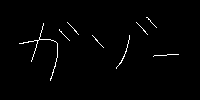

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=np.int)
out[img[..., 0]>0] = 1

out = 1 - out

while True:
    s1 = []
    s2 = []

    # step 1
    for y in range(1, H-1):
        for x in range(1, W-1):
            
            # condition 1
            if out[y, x] > 0:
                continue
# condition 2
            f1 = 0
            if (out[y-1, x+1] - out[y-1, x]) == 1:
                f1 += 1
            if (out[y, x+1] - out[y-1, x+1]) == 1:
                f1 += 1
            if (out[y+1, x+1] - out[y, x+1]) == 1:
                f1 += 1
            if (out[y+1, x] - out[y+1,x+1]) == 1:
                f1 += 1
            if (out[y+1, x-1] - out[y+1, x]) == 1:
                f1 += 1
            if (out[y, x-1] - out[y+1, x-1]) == 1:
                f1 += 1
            if (out[y-1, x-1] - out[y, x-1]) == 1:
                f1 += 1
            if (out[y-1, x] - out[y-1, x-1]) == 1:
                f1 += 1

            if f1 != 1:
                continue
                
            # condition 3
            f2 = np.sum(out[y-1:y+2, x-1:x+2])
            if f2 < 2 or f2 > 6:
                continue
            
            # condition 4
            if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                continue

            # condition 5
            if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                continue
                
            s1.append([y, x])

    for v in s1:
        out[v[0], v[1]] = 1

    # step 2
    for y in range(1, H-1):
        for x in range(1, W-1):
            
            # condition 1
            if out[y, x] > 0:
                continue

            # condition 2
            f1 = 0
            if (out[y-1, x+1] - out[y-1, x]) == 1:
                f1 += 1
            if (out[y, x+1] - out[y-1, x+1]) == 1:
                f1 += 1
            if (out[y+1, x+1] - out[y, x+1]) == 1:
                f1 += 1
            if (out[y+1, x] - out[y+1,x+1]) == 1:
                f1 += 1
            if (out[y+1, x-1] - out[y+1, x]) == 1:
                f1 += 1
            if (out[y, x-1] - out[y+1, x-1]) == 1:
                f1 += 1
            if (out[y-1, x-1] - out[y, x-1]) == 1:
                f1 += 1
            if (out[y-1, x] - out[y-1, x-1]) == 1:
                f1 += 1

            if f1 != 1:
                continue
                
            # condition 3
            f2 = np.sum(out[y-1:y+2, x-1:x+2])
            if f2 < 2 or f2 > 6:
                continue
            
            # condition 4
            if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                continue

            # condition 5
            if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                continue
                
            s2.append([y, x])

    for v in s2:
        out[v[0], v[1]] = 1

    if len(s1) < 1 and len(s2) < 1:
        break

out = 1 - out
out = out.astype(np.uint8) * 255

# Save result
cv2_imshow(out)


#66 HOG (Step.1) 勾配強度・勾配角度

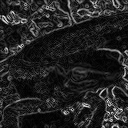

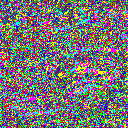

In [4]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
W, H, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

gray = np.pad(gray, (1, 1), 'edge')
gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
gx[gx == 0] = 0.000001

mag = np.sqrt(gx ** 2 + gy ** 2)
gra = np.arctan(gy / gx)
gra[gra< 0] = np.pi / 2 + gra[gra<0] + np.pi / 2

gra_n = np.zeros_like(gra, dtype=np.int)

d = np.pi/ 9
for i in range(9):
    gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i
    
_mag = (mag / mag.max() * 255).astype(np.uint8)

cv2_imshow(_mag)

out = np.zeros((W, H, 3), dtype=np.uint8)
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]
for i in range(9):
    out[gra_n == i] = C[i]  

cv2_imshow(out)